In [1]:
from bigraph_viz.plot_old import plot_bigraph

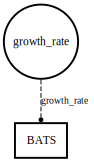

In [2]:
BATS = {
    'BATS': {
        '_type': 'process',
        'wires': {
            'growth_rate': ['growth_rate',]
        }
    }
}

plot_bigraph(BATS)

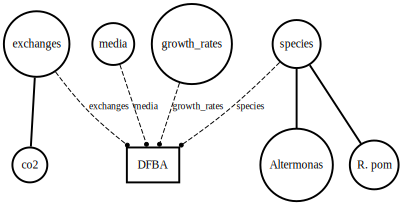

In [10]:
DFBA = {
    'DFBA': {
        '_type': 'process',
        'wires': {
            'media': ['media',],
            'species': ['species',],
            'growth_rates': ['growth_rates',],
            'exchanges': ['exchanges',],
        }
    },
    'exchanges': {
       'co2': 'conc'
    },
    'species': {
        'Altermonas': 'bacteria',
        'R. pom': 'bacteria'
    }
}

plot_bigraph(DFBA)

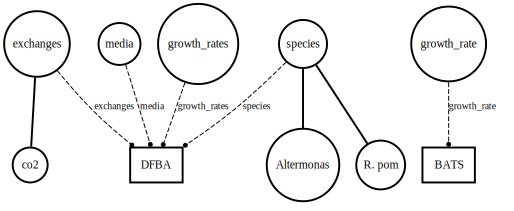

In [11]:
hybrid_model = {
    **BATS, **DFBA
}

plot_bigraph(hybrid_model)